Question 4. Modify ‘maxwell1d-I.py’ to simulate an EM 
wave passing through a boundary between two media 
with refractive indices n1
and n2
. Compare the reflectance 
(R) and transmittance (T) obtained from your simulations 
with the following known formulae.

$T = {{I_{t}}\over{I_{i}}}= {{I_{r}}\over{I_{i}}}={{\epsilon_{2}v_{2}}\over{\epsilon_{1}v_{1}}}|{{E_{t}}\over{E_{i}}}|^{2} = {{4n_{1}n_{2}}\over{({n_{1}+n_{2}})^2}}$

$R = {|{{E_{r}}\over{E_{i}}}|}^{2} = {({{n_{1}-n_{2}}\over{n_{1}+n_{2}}})^2}$

Note: assume the media are non-magnetic, i.e $\mu = \mu_{0}$. Then the refractive 
index is determined by the permittivity; $ n = \sqrt {\epsilon/\epsilon_{0}}$

1. import package

In [4]:
import numpy as np
import matplotlib.pyplot as plt

2. variables

In [2]:
xmax=float(4) #max of x coordinate
dx=float(0.01) # differential of x
dt=float(0.005) #time interval
f=float(4) # frequency
smax=int(800) # # of iteration
n1 = float(1) # refractive index of incident space
n2 = float(1.3) # refractive index of transmission space
dsav = int(50) # time interval for animate

3. simulation factor

In [5]:
a=dt/dx  #coefficient for recurrence relation
w=2.0*np.pi*f # angular frequency

In [6]:
x=np.arange(0,xmax+dx,dx) #x- coordinate space
c=int(0.5*xmax/dx) #center of coordinate : Let the boundary between two media be here.

4. Electric field and magnetic fiend function, initial condition

In [7]:
Ey=0*x; Ez=0*x
By=0*x; Bz=0*x

In [8]:
# factor to measure the amplitude of incident wave
Ei = 0
tmp = 0
# iteration factor 
s=0


refractive index n = c/v when v is velocity in that media
Therefore we should change c to v by dividing n.
Incident media [:c] has n1 and Transmission media [c:] has n2

Faraday's law doesn't depend on velocity of wave in media. So, It would be same before.

Ampere's law have velocity factor. It should be divded by refractive index.

In [15]:
while s < smax:
    By[:-1] += a * (Ez[1:] - Ez[:-1])
    Bz[:-1] += -a * (Ey[1:] - Ey[:-1])

    Ey[1:c] += -a * (Bz[1:c] - Bz[0:c - 1]) / (n1 ** 2) # incident space
    Ey[c:-1] += -a * (Bz[c:-1] - Bz[c - 1:-2]) / (n2 ** 2) # Transmission space 
    if w * s * dt < 4.05/2*np.pi: # To observe reflective wavey clearly
        #we will emit just pulse.Otherwise, incident and reflective wave will be overlapped.
        Ey[0] += dt * (np.sin(w * s * dt))/ (n1 ** 2) #wave source 
        #Ey[0] =  (np.sin(w * s * dt)) #if you want sine-wave
        #find maximum value(amplitude) of incident wave
        tmp = Ey[0]
        if Ei < tmp :
            Ei = tmp
    Ez[1:c] += a * (By[1:c] - By[0:c - 1]) / (n1 ** 2)# incident space
    Ez[c:-1] += a * (By[c:-1] - By[c - 1:-2]) / (n2 ** 2)# Transmission space
    """
   #snap shot once dsav :But it does not work in jupyter notebook. So, I treat it as comment. But it will work in other IDE
    if s % dsav == 0:
        plt.ylim(-0.2,0.2)  # set the ylimit of sub-panels
        plt.yticks(np.arange(-0.2,0.2, 0.04))  # yticks
        plt.plot(x, Ey)
        plt.draw()
        plt.pause(0.01)
        plt.clf()
     """
    s += 1


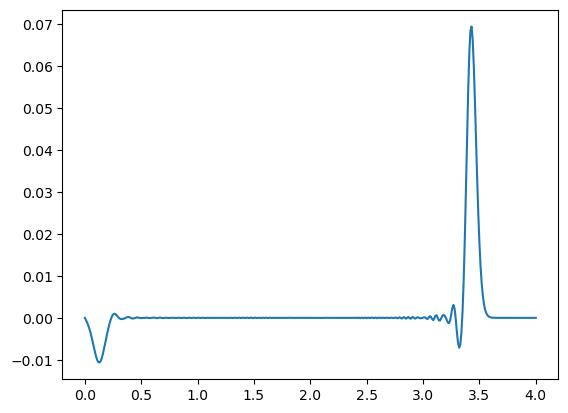

In [16]:
plt.plot(x,Ey)
plt.show()

5. find amplitude of reflexive and transmitted wave. 

In [20]:
Et = np.max(Ey[c:])
Er = abs(np.min(Ey[:c]))
print(f"Ei is {Ei}\nEt is {Et}\nEr is {Er}")

Ei is 0.07947272421932652
Et is 0.06944623137070448
Er is 0.010634864802872212


6.Measure T and R
$T ={{\epsilon_{2}v_{2}}\over{\epsilon_{1}v_{1}}}{|{{E_{t}}\over{E_{i}}}|}^{2} = {{n_{2}}\over{n_{1}}}{|{{E_{t}}\over{E_{i}}}|}^{2}\\
R = {|{{E_{r}}\over{E_{i}}}|}^{2} $

In [25]:
m_T = (n2/n1)*((Et/Ei)**2)
m_R = (Er/Ei)**2
print(f"measured T is {m_T}\nmeasured R is {m_R}\n T+R={m_T+m_R}")

measured T is 0.9926691325213437
measured R is 0.017907202545581116
 T+R=1.0105763350669248


7.Evaluate T and R

$T = {{4n_{1}n_{2}}\over{({n_{1}+n_{2}})^2}}$

$R = {({{n_{1}-n_{2}}\over{n_{1}+n_{2}}})^2}$


In [27]:
c_T = 4*(n1*n2)/((n1+n2)**2)
c_R = ((n1-n2)/(n1+n2))**2
print(f"calculated T is {c_T}\ncalculated R is {c_R}\n T+R={c_T+c_R}")

calculated T is 0.9829867674858225
calculated R is 0.0170132325141777
 T+R=1.0000000000000002


8. Compare measured values and calculated values

In [29]:
err_T = (abs(m_T-c_T)/c_T)*100
err_R = (abs(m_R-c_R)/c_R)*100
print(f"Error of T is {err_T}%\nError of R is {err_R}%")

Error of T is 0.9849944430366782%
Error of R is 5.254557184582296%
